In [36]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
sns.set(font_scale=1.2)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

import pickle
import re

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset

In [6]:
df = pd.read_csv(r'part6\Historical Weather Data 2010-2021_preprocessed_1.csv')
df.head()

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,5,4,4,4,9.8,45,6.77,7.66,1707.0,1,1,1,0,0,0
2,2010-01-03,3,1,2010,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,4,4,4,4,9.8,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,5,5,5,5,9.8,44,6.53,8.05,1709.0,0,0,0,0,0,0


In [7]:
# columns name 
print(list(df.columns))

['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   observation                               4227 non-null   object 
 1   date                                      4227 non-null   int64  
 2   month                                     4227 non-null   int64  
 3   year                                      4227 non-null   int64  
 4   tempC_7to8                                4227 non-null   int64  
 5   tempC_1to2                                4227 non-null   int64  
 6   tempC_6to7                                4227 non-null   int64  
 7   tempC_avg(0C)                             4227 non-null   int64  
 8   Relative humidity_7to8                    4227 non-null   int64  
 9   Relative humidity_1to2                    4227 non-null   int64  
 10  Relative humidity_6to7              

# Build model for binary classifier

In [38]:
def builModels(X, Y, classifierModel):
    
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)
    
    classifierModel.fit(X_train, y_train)  
    
    y_pred = classifierModel.predict(X_test)
    
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    
    print("Precision:", round((precision_score(y_test, y_pred))*100,2),'%')
    
    print("Recall:", round((recall_score(y_test, y_pred))*100,2),'%')
    
    print("f1_score:", round((f1_score(y_test, y_pred))*100,2),'%')
    
    print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

    print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


    fig, ax = plt.subplots()
    fig.set_size_inches(6,4) # WH
    sns.heatmap(confusion_matrix(y_test, y_pred), 
               annot=True,
                     linewidths = 2,
                    linecolor = "blue",
                    center=0)
    plt.show()
    
    return classifierModel, {'Accuracy': round((accuracy_score(y_test, y_pred))*100,2), 
                             'Loss': round((1-accuracy_score(y_test, y_pred))*100,2), 
                             'Precision': round((precision_score(y_test, y_pred))*100,2), 
                             'Recall': round((recall_score(y_test, y_pred))*100,2),
                             'f1_score': round((f1_score(y_test, y_pred))*100,2),
                             'Cohen_kappa': round((cohen_kappa_score(y_test, y_pred))*100,2)}

In [39]:
X = df[['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 
        'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']]
Y1 = df[['Label (Disease Yes/No)']]
Y2 = df[['Type of Disease (Bacterial Blight/Telya)']]
Y3 = df[['Anthracnose']]
Y4 = df[['Fruit Spot/ Rot']]
Y5 = df[['Fusarium Wilt']]
Y6 = df[['Fruit Borer / Blight Blora']]

# Classifier's

In [40]:
lr_Classifier = LogisticRegression(max_iter=1000, random_state=3757)  
knn_Classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=5, p=2, weights='uniform')  
nb_Classifier = GaussianNB(priors=None, var_smoothing=1e-09)
dt_Classifier = DecisionTreeClassifier(random_state=3757)
rf_Classifier = RandomForestClassifier(n_jobs=-1, random_state=3757)
gb_Classifier = GradientBoostingClassifier(random_state=3757)
ab_Classifier = AdaBoostClassifier(random_state=3757)

classifiers = [lr_Classifier, knn_Classifier, nb_Classifier, dt_Classifier, 
               rf_Classifier, gb_Classifier, ab_Classifier]
Y_name = [Y1, Y2, Y3, Y4, Y5, Y6]
model_name = ['lr_Classifier', 'knn_Classifier', 'nb_Classifier', 'dt_Classifier', 
              'rf_Classifier', 'gb_Classifier', 'ab_Classifier']

Column : Label (Disease Yes/No)
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 89.52 %
Loss: 10.48 %
Precision: 89.24 %
Recall: 85.01 %
f1_score: 87.07 %
Cohen_kappa_score: 78.27 %
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       742
           1       0.89      0.85      0.87       527

    accuracy                           0.90      1269
   macro avg       0.89      0.89      0.89      1269
weighted avg       0.90      0.90      0.89      1269

confusion_matrix:
 [[688  54]
 [ 79 448]]


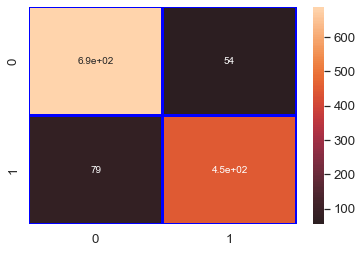

File saved : Label_Disease_Yes_No__lr_Classifier.pkl
data : {'Accuracy': 89.52, 'Loss': 10.48, 'Precision': 89.24, 'Recall': 85.01, 'f1_score': 87.07, 'Cohen_kappa': 78.27, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'lr_Classifier', 'Filename': 'Label_Disease_Yes_No__lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_score: 88.26 %
Loss: 11.74 %
Precision: 89.87 %
Recall: 80.83 %
f1_score: 85.11 %
Cohen_kappa_score: 75.47 %
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       742
           1       0.90      0.81      0.85       527

    accuracy                           0.88      1269
   macro avg       0.89      0.87      0.88      1269
weighted avg       0.88      0.88      0.88      1269

confusion_matrix:
 [[694  48]
 [101 426]]


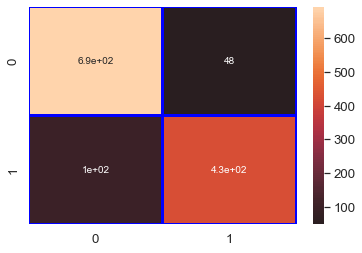

File saved : Label_Disease_Yes_No__knn_Classifier.pkl
data : {'Accuracy': 88.26, 'Loss': 11.74, 'Precision': 89.87, 'Recall': 80.83, 'f1_score': 85.11, 'Cohen_kappa': 75.47, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'knn_Classifier', 'Filename': 'Label_Disease_Yes_No__knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 86.84 %
Loss: 13.16 %
Precision: 89.47 %
Recall: 77.42 %
f1_score: 83.01 %
Cohen_kappa_score: 72.36 %
Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       742
           1       0.89      0.77      0.83       527

    accuracy                           0.87      1269
   macro avg       0.87      0.85      0.86      1269
weighted avg       0.87      0.87      0.87      1269

confusion_matrix:
 [[694  48]
 [119 408]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


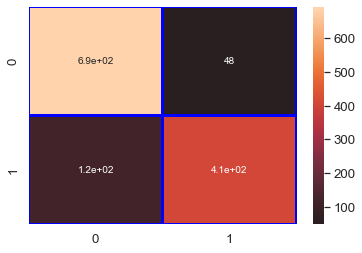

File saved : Label_Disease_Yes_No__nb_Classifier.pkl
data : {'Accuracy': 86.84, 'Loss': 13.16, 'Precision': 89.47, 'Recall': 77.42, 'f1_score': 83.01, 'Cohen_kappa': 72.36, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'nb_Classifier', 'Filename': 'Label_Disease_Yes_No__nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 93.46 %
Loss: 6.54 %
Precision: 94.4 %
Recall: 89.56 %
f1_score: 91.92 %
Cohen_kappa_score: 86.43 %
Classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       742
           1       0.94      0.90      0.92       527

    accuracy                           0.93      1269
   macro avg       0.94      0.93      0.93      1269
weighted avg       0.93      0.93      0.93      1269

confusion_matrix:
 [[714  28]
 [ 55 472]]


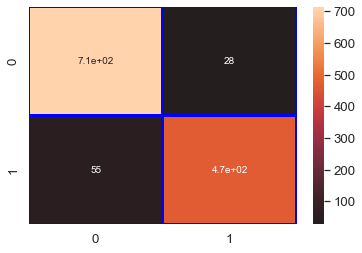

File saved : Label_Disease_Yes_No__dt_Classifier.pkl
data : {'Accuracy': 93.46, 'Loss': 6.54, 'Precision': 94.4, 'Recall': 89.56, 'f1_score': 91.92, 'Cohen_kappa': 86.43, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'dt_Classifier', 'Filename': 'Label_Disease_Yes_No__dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 96.53 %
Loss: 3.47 %
Precision: 94.81 %
Recall: 96.96 %
f1_score: 95.87 %
Cohen_kappa_score: 92.88 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.95      0.97      0.96       527

    accuracy                           0.97      1269
   macro avg       0.96      0.97      0.96      1269
weighted avg       0.97      0.97      0.97      1269

confusion_matrix:
 [[714  28]
 [ 16 511]]


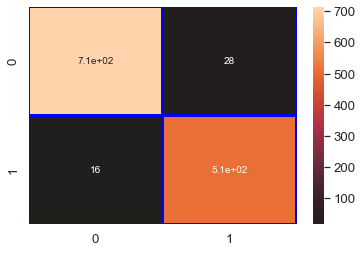

File saved : Label_Disease_Yes_No__rf_Classifier.pkl
data : {'Accuracy': 96.53, 'Loss': 3.47, 'Precision': 94.81, 'Recall': 96.96, 'f1_score': 95.87, 'Cohen_kappa': 92.88, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'rf_Classifier', 'Filename': 'Label_Disease_Yes_No__rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 96.45 %
Loss: 3.55 %
Precision: 94.8 %
Recall: 96.77 %
f1_score: 95.77 %
Cohen_kappa_score: 92.72 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.95      0.97      0.96       527

    accuracy                           0.96      1269
   macro avg       0.96      0.97      0.96      1269
weighted avg       0.96      0.96      0.96      1269

confusion_matrix:
 [[714  28]
 [ 17 510]]


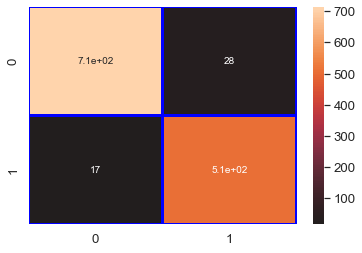

File saved : Label_Disease_Yes_No__gb_Classifier.pkl
data : {'Accuracy': 96.45, 'Loss': 3.55, 'Precision': 94.8, 'Recall': 96.77, 'f1_score': 95.77, 'Cohen_kappa': 92.72, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'gb_Classifier', 'Filename': 'Label_Disease_Yes_No__gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 95.11 %
Loss: 4.89 %
Precision: 94.12 %
Recall: 94.12 %
f1_score: 94.12 %
Cohen_kappa_score: 89.94 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       742
           1       0.94      0.94      0.94       527

    accuracy                           0.95      1269
   macro avg       0.95      0.95      0.95      1269
weighted avg       0.95      0.95      0.95      1269

confusion_matrix:
 [[711  31]
 [ 31 496]]


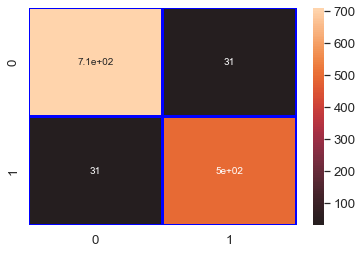

File saved : Label_Disease_Yes_No__ab_Classifier.pkl
data : {'Accuracy': 95.11, 'Loss': 4.89, 'Precision': 94.12, 'Recall': 94.12, 'f1_score': 94.12, 'Cohen_kappa': 89.94, 'Feature_name': 'Label (Disease Yes/No)', 'Model_name': 'ab_Classifier', 'Filename': 'Label_Disease_Yes_No__ab_Classifier.pkl'}
Column : Type of Disease (Bacterial Blight/Telya)
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 84.4 %
Loss: 15.6 %
Precision: 78.95 %
Recall: 59.66 %
f1_score: 67.96 %
Cohen_kappa_score: 57.91 %
Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       917
           1       0.79      0.60      0.68       352

    accuracy                           0.84      1269
   macro avg       0.82      0.77      0.79      1269
weighted avg       0.84      0.84      0.84      1269

confusion_matrix:
 [[861  56]
 [142 210]]


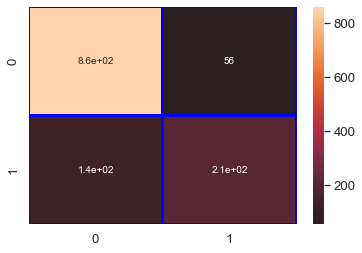

File saved : Type_of_Disease_Bacterial_Blight_Telya__lr_Classifier.pkl
data : {'Accuracy': 84.4, 'Loss': 15.6, 'Precision': 78.95, 'Recall': 59.66, 'f1_score': 67.96, 'Cohen_kappa': 57.91, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'lr_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_score: 87.86 %
Loss: 12.14 %
Precision: 83.45 %
Recall: 70.17 %
f1_score: 76.23 %
Cohen_kappa_score: 68.17 %
Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       917
           1       0.83      0.70      0.76       352

    accuracy                           0.88      1269
   macro avg       0.86      0.82      0.84      1269
weighted avg       0.88      0.88      0.88      1269

confusion_matrix:
 [[868  49]
 [105 247]]


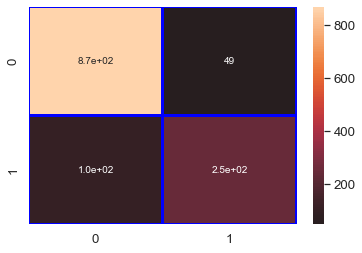

File saved : Type_of_Disease_Bacterial_Blight_Telya__knn_Classifier.pkl
data : {'Accuracy': 87.86, 'Loss': 12.14, 'Precision': 83.45, 'Recall': 70.17, 'f1_score': 76.23, 'Cohen_kappa': 68.17, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'knn_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 74.39 %
Loss: 25.61 %
Precision: 53.08 %
Recall: 66.19 %
f1_score: 58.91 %
Cohen_kappa_score: 40.63 %
Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.81       917
           1       0.53      0.66      0.59       352

    accuracy                           0.74      1269
   macro avg       0.69      0.72      0.70      1269
weighted avg       0.77      0.74      0.75      1269

confusion_matrix:
 [[711 206]
 [119 233]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


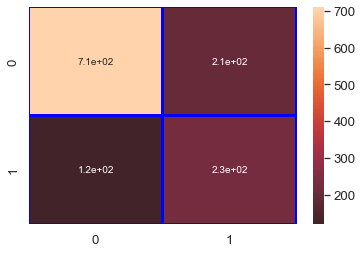

File saved : Type_of_Disease_Bacterial_Blight_Telya__nb_Classifier.pkl
data : {'Accuracy': 74.39, 'Loss': 25.61, 'Precision': 53.08, 'Recall': 66.19, 'f1_score': 58.91, 'Cohen_kappa': 40.63, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'nb_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 96.3 %
Loss: 3.7 %
Precision: 94.46 %
Recall: 92.05 %
f1_score: 93.24 %
Cohen_kappa_score: 90.69 %
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       917
           1       0.94      0.92      0.93       352

    accuracy                           0.96      1269
   macro avg       0.96      0.95      0.95      1269
weighted avg       0.96      0.96      0.96      1269

confusion_matrix:
 [[898  19]
 [ 28 324]]


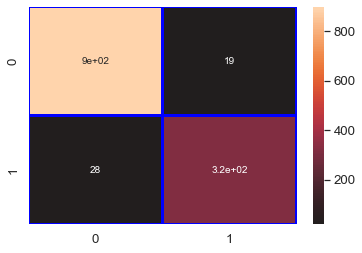

File saved : Type_of_Disease_Bacterial_Blight_Telya__dt_Classifier.pkl
data : {'Accuracy': 96.3, 'Loss': 3.7, 'Precision': 94.46, 'Recall': 92.05, 'f1_score': 93.24, 'Cohen_kappa': 90.69, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'dt_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 97.87 %
Loss: 2.13 %
Precision: 96.83 %
Recall: 95.45 %
f1_score: 96.14 %
Cohen_kappa_score: 94.67 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       917
           1       0.97      0.95      0.96       352

    accuracy                           0.98      1269
   macro avg       0.98      0.97      0.97      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[906  11]
 [ 16 336]]


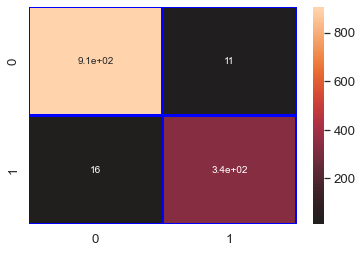

File saved : Type_of_Disease_Bacterial_Blight_Telya__rf_Classifier.pkl
data : {'Accuracy': 97.87, 'Loss': 2.13, 'Precision': 96.83, 'Recall': 95.45, 'f1_score': 96.14, 'Cohen_kappa': 94.67, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'rf_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 97.56 %
Loss: 2.44 %
Precision: 95.99 %
Recall: 95.17 %
f1_score: 95.58 %
Cohen_kappa_score: 93.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       917
           1       0.96      0.95      0.96       352

    accuracy                           0.98      1269
   macro avg       0.97      0.97      0.97      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[903  14]
 [ 17 335]]


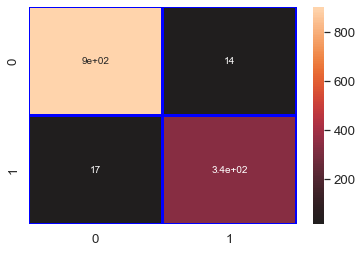

File saved : Type_of_Disease_Bacterial_Blight_Telya__gb_Classifier.pkl
data : {'Accuracy': 97.56, 'Loss': 2.44, 'Precision': 95.99, 'Recall': 95.17, 'f1_score': 95.58, 'Cohen_kappa': 93.89, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'gb_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 97.56 %
Loss: 2.44 %
Precision: 97.07 %
Recall: 94.03 %
f1_score: 95.53 %
Cohen_kappa_score: 93.85 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       917
           1       0.97      0.94      0.96       352

    accuracy                           0.98      1269
   macro avg       0.97      0.96      0.97      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[907  10]
 [ 21 331]]


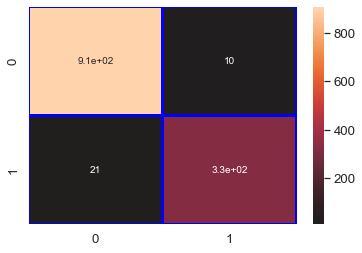

File saved : Type_of_Disease_Bacterial_Blight_Telya__ab_Classifier.pkl
data : {'Accuracy': 97.56, 'Loss': 2.44, 'Precision': 97.07, 'Recall': 94.03, 'f1_score': 95.53, 'Cohen_kappa': 93.85, 'Feature_name': 'Type of Disease (Bacterial Blight/Telya)', 'Model_name': 'ab_Classifier', 'Filename': 'Type_of_Disease_Bacterial_Blight_Telya__ab_Classifier.pkl'}
Column : Anthracnose
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 82.98 %
Loss: 17.02 %
Precision: 39.68 %
Recall: 12.32 %
f1_score: 18.8 %
Cohen_kappa_score: 12.14 %
Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1066
           1       0.40      0.12      0.19       203

    accuracy                           0.83      1269
   macro avg       0.62      0.54      0.55      1269
weighted avg       0.78      0.83      0.79      1269

confusion_matrix:
 [[1028   38]
 [ 178   25]]


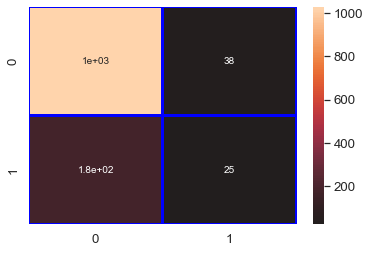

File saved : Anthracnose_lr_Classifier.pkl
data : {'Accuracy': 82.98, 'Loss': 17.02, 'Precision': 39.68, 'Recall': 12.32, 'f1_score': 18.8, 'Cohen_kappa': 12.14, 'Feature_name': 'Anthracnose', 'Model_name': 'lr_Classifier', 'Filename': 'Anthracnose_lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_score: 94.72 %
Loss: 5.28 %
Precision: 83.33 %
Recall: 83.74 %
f1_score: 83.54 %
Cohen_kappa_score: 80.39 %
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1066
           1       0.83      0.84      0.84       203

    accuracy                           0.95      1269
   macro avg       0.90      0.90      0.90      1269
weighted avg       0.95      0.95      0.95      1269

confusion_matrix:
 [[1032   34]
 [  33  170]]


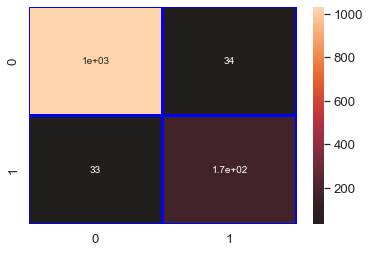

File saved : Anthracnose_knn_Classifier.pkl
data : {'Accuracy': 94.72, 'Loss': 5.28, 'Precision': 83.33, 'Recall': 83.74, 'f1_score': 83.54, 'Cohen_kappa': 80.39, 'Feature_name': 'Anthracnose', 'Model_name': 'knn_Classifier', 'Filename': 'Anthracnose_knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 80.06 %
Loss: 19.94 %
Precision: 43.49 %
Recall: 82.27 %
f1_score: 56.9 %
Cohen_kappa_score: 45.49 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      1066
           1       0.43      0.82      0.57       203

    accuracy                           0.80      1269
   macro avg       0.70      0.81      0.72      1269
weighted avg       0.88      0.80      0.82      1269

confusion_matrix:
 [[849 217]
 [ 36 167]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


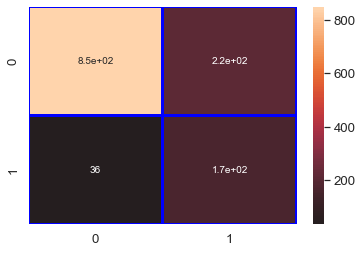

File saved : Anthracnose_nb_Classifier.pkl
data : {'Accuracy': 80.06, 'Loss': 19.94, 'Precision': 43.49, 'Recall': 82.27, 'f1_score': 56.9, 'Cohen_kappa': 45.49, 'Feature_name': 'Anthracnose', 'Model_name': 'nb_Classifier', 'Filename': 'Anthracnose_nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 97.56 %
Loss: 2.44 %
Precision: 95.26 %
Recall: 89.16 %
f1_score: 92.11 %
Cohen_kappa_score: 90.67 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1066
           1       0.95      0.89      0.92       203

    accuracy                           0.98      1269
   macro avg       0.97      0.94      0.95      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[1057    9]
 [  22  181]]


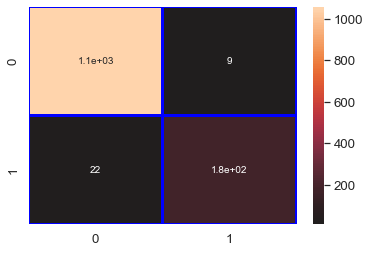

File saved : Anthracnose_dt_Classifier.pkl
data : {'Accuracy': 97.56, 'Loss': 2.44, 'Precision': 95.26, 'Recall': 89.16, 'f1_score': 92.11, 'Cohen_kappa': 90.67, 'Feature_name': 'Anthracnose', 'Model_name': 'dt_Classifier', 'Filename': 'Anthracnose_dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 98.66 %
Loss: 1.34 %
Precision: 97.45 %
Recall: 94.09 %
f1_score: 95.74 %
Cohen_kappa_score: 94.94 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1066
           1       0.97      0.94      0.96       203

    accuracy                           0.99      1269
   macro avg       0.98      0.97      0.97      1269
weighted avg       0.99      0.99      0.99      1269

confusion_matrix:
 [[1061    5]
 [  12  191]]


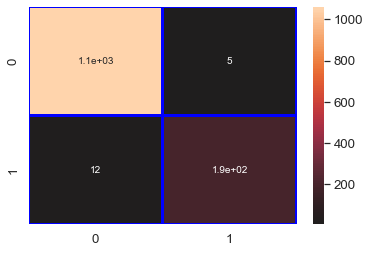

File saved : Anthracnose_rf_Classifier.pkl
data : {'Accuracy': 98.66, 'Loss': 1.34, 'Precision': 97.45, 'Recall': 94.09, 'f1_score': 95.74, 'Cohen_kappa': 94.94, 'Feature_name': 'Anthracnose', 'Model_name': 'rf_Classifier', 'Filename': 'Anthracnose_rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 98.19 %
Loss: 1.81 %
Precision: 94.55 %
Recall: 94.09 %
f1_score: 94.32 %
Cohen_kappa_score: 93.24 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1066
           1       0.95      0.94      0.94       203

    accuracy                           0.98      1269
   macro avg       0.97      0.97      0.97      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[1055   11]
 [  12  191]]


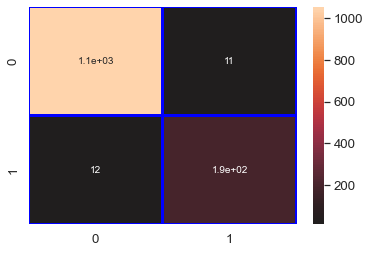

File saved : Anthracnose_gb_Classifier.pkl
data : {'Accuracy': 98.19, 'Loss': 1.81, 'Precision': 94.55, 'Recall': 94.09, 'f1_score': 94.32, 'Cohen_kappa': 93.24, 'Feature_name': 'Anthracnose', 'Model_name': 'gb_Classifier', 'Filename': 'Anthracnose_gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 98.03 %
Loss: 1.97 %
Precision: 94.06 %
Recall: 93.6 %
f1_score: 93.83 %
Cohen_kappa_score: 92.66 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1066
           1       0.94      0.94      0.94       203

    accuracy                           0.98      1269
   macro avg       0.96      0.96      0.96      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[1054   12]
 [  13  190]]


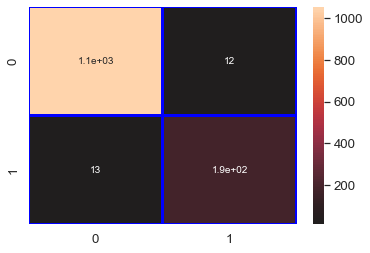

File saved : Anthracnose_ab_Classifier.pkl
data : {'Accuracy': 98.03, 'Loss': 1.97, 'Precision': 94.06, 'Recall': 93.6, 'f1_score': 93.83, 'Cohen_kappa': 92.66, 'Feature_name': 'Anthracnose', 'Model_name': 'ab_Classifier', 'Filename': 'Anthracnose_ab_Classifier.pkl'}
Column : Fruit Spot/ Rot
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 97.95 %
Loss: 2.05 %
Precision: 92.48 %
Recall: 88.49 %
f1_score: 90.44 %
Cohen_kappa_score: 89.29 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.92      0.88      0.90       139

    accuracy                           0.98      1269
   macro avg       0.96      0.94      0.95      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[1120   10]
 [  16  123]]


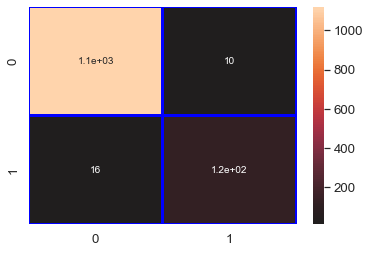

File saved : Fruit_Spot_Rot_lr_Classifier.pkl
data : {'Accuracy': 97.95, 'Loss': 2.05, 'Precision': 92.48, 'Recall': 88.49, 'f1_score': 90.44, 'Cohen_kappa': 89.29, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'lr_Classifier', 'Filename': 'Fruit_Spot_Rot_lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_score: 99.13 %
Loss: 0.87 %
Precision: 93.84 %
Recall: 98.56 %
f1_score: 96.14 %
Cohen_kappa_score: 95.65 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1130
           1       0.94      0.99      0.96       139

    accuracy                           0.99      1269
   macro avg       0.97      0.99      0.98      1269
weighted avg       0.99      0.99      0.99      1269

confusion_matrix:
 [[1121    9]
 [   2  137]]


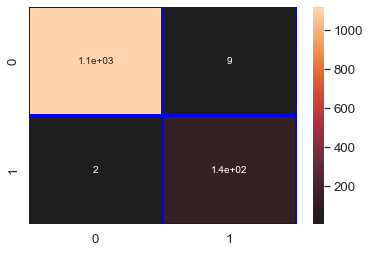

File saved : Fruit_Spot_Rot_knn_Classifier.pkl
data : {'Accuracy': 99.13, 'Loss': 0.87, 'Precision': 93.84, 'Recall': 98.56, 'f1_score': 96.14, 'Cohen_kappa': 95.65, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'knn_Classifier', 'Filename': 'Fruit_Spot_Rot_knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 92.28 %
Loss: 7.72 %
Precision: 58.8 %
Recall: 98.56 %
f1_score: 73.66 %
Cohen_kappa_score: 69.47 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.95      1130
           1       0.59      0.99      0.74       139

    accuracy                           0.92      1269
   macro avg       0.79      0.95      0.85      1269
weighted avg       0.95      0.92      0.93      1269

confusion_matrix:
 [[1034   96]
 [   2  137]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


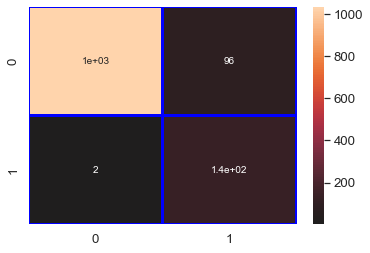

File saved : Fruit_Spot_Rot_nb_Classifier.pkl
data : {'Accuracy': 92.28, 'Loss': 7.72, 'Precision': 58.8, 'Recall': 98.56, 'f1_score': 73.66, 'Cohen_kappa': 69.47, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'nb_Classifier', 'Filename': 'Fruit_Spot_Rot_nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 98.56 %
f1_score: 99.28 %
Cohen_kappa_score: 99.19 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       1.00      0.99      0.99       139

    accuracy                           1.00      1269
   macro avg       1.00      0.99      1.00      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1130    0]
 [   2  137]]


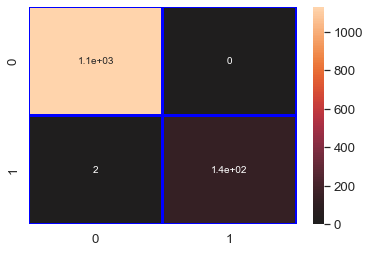

File saved : Fruit_Spot_Rot_dt_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 98.56, 'f1_score': 99.28, 'Cohen_kappa': 99.19, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'dt_Classifier', 'Filename': 'Fruit_Spot_Rot_dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 99.92 %
Loss: 0.08 %
Precision: 100.0 %
Recall: 99.28 %
f1_score: 99.64 %
Cohen_kappa_score: 99.59 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       1.00      0.99      1.00       139

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1130    0]
 [   1  138]]


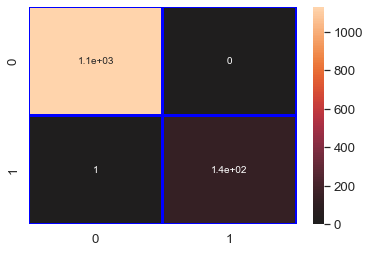

File saved : Fruit_Spot_Rot_rf_Classifier.pkl
data : {'Accuracy': 99.92, 'Loss': 0.08, 'Precision': 100.0, 'Recall': 99.28, 'f1_score': 99.64, 'Cohen_kappa': 99.59, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'rf_Classifier', 'Filename': 'Fruit_Spot_Rot_rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 98.56 %
f1_score: 99.28 %
Cohen_kappa_score: 99.19 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       1.00      0.99      0.99       139

    accuracy                           1.00      1269
   macro avg       1.00      0.99      1.00      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1130    0]
 [   2  137]]


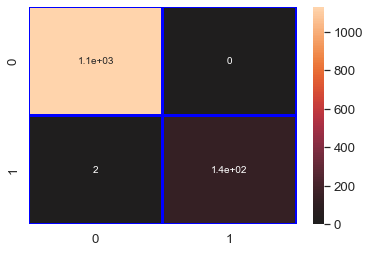

File saved : Fruit_Spot_Rot_gb_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 98.56, 'f1_score': 99.28, 'Cohen_kappa': 99.19, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'gb_Classifier', 'Filename': 'Fruit_Spot_Rot_gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.76 %
Loss: 0.24 %
Precision: 99.28 %
Recall: 98.56 %
f1_score: 98.92 %
Cohen_kappa_score: 98.78 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       0.99      0.99      0.99       139

    accuracy                           1.00      1269
   macro avg       1.00      0.99      0.99      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1129    1]
 [   2  137]]


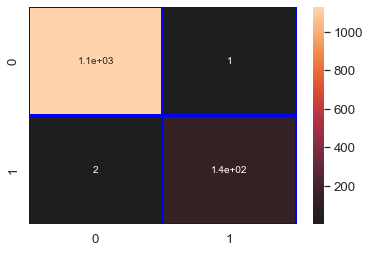

File saved : Fruit_Spot_Rot_ab_Classifier.pkl
data : {'Accuracy': 99.76, 'Loss': 0.24, 'Precision': 99.28, 'Recall': 98.56, 'f1_score': 98.92, 'Cohen_kappa': 98.78, 'Feature_name': 'Fruit Spot/ Rot', 'Model_name': 'ab_Classifier', 'Filename': 'Fruit_Spot_Rot_ab_Classifier.pkl'}
Column : Fusarium Wilt
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 93.55 %
f1_score: 96.67 %
Cohen_kappa_score: 96.59 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      0.94      0.97        31

    accuracy                           1.00      1269
   macro avg       1.00      0.97      0.98      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1238    0]
 [   2   29]]


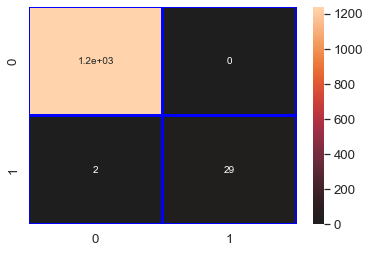

File saved : Fusarium_Wilt_lr_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 93.55, 'f1_score': 96.67, 'Cohen_kappa': 96.59, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'lr_Classifier', 'Filename': 'Fusarium_Wilt_lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_score: 99.05 %
Loss: 0.95 %
Precision: 100.0 %
Recall: 61.29 %
f1_score: 76.0 %
Cohen_kappa_score: 75.55 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1238
           1       1.00      0.61      0.76        31

    accuracy                           0.99      1269
   macro avg       1.00      0.81      0.88      1269
weighted avg       0.99      0.99      0.99      1269

confusion_matrix:
 [[1238    0]
 [  12   19]]


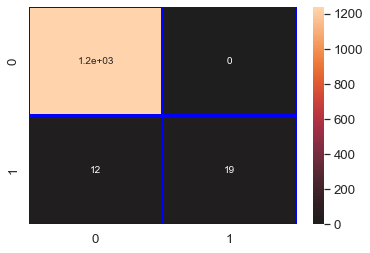

File saved : Fusarium_Wilt_knn_Classifier.pkl
data : {'Accuracy': 99.05, 'Loss': 0.95, 'Precision': 100.0, 'Recall': 61.29, 'f1_score': 76.0, 'Cohen_kappa': 75.55, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'knn_Classifier', 'Filename': 'Fusarium_Wilt_knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 93.93 %
Loss: 6.07 %
Precision: 27.88 %
Recall: 93.55 %
f1_score: 42.96 %
Cohen_kappa_score: 40.73 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1238
           1       0.28      0.94      0.43        31

    accuracy                           0.94      1269
   macro avg       0.64      0.94      0.70      1269
weighted avg       0.98      0.94      0.95      1269

confusion_matrix:
 [[1163   75]
 [   2   29]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


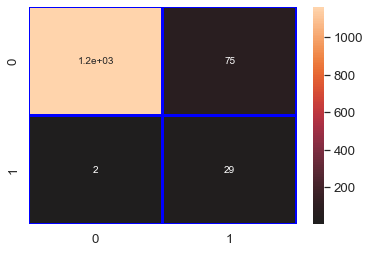

File saved : Fusarium_Wilt_nb_Classifier.pkl
data : {'Accuracy': 93.93, 'Loss': 6.07, 'Precision': 27.88, 'Recall': 93.55, 'f1_score': 42.96, 'Cohen_kappa': 40.73, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'nb_Classifier', 'Filename': 'Fusarium_Wilt_nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 99.92 %
Loss: 0.08 %
Precision: 100.0 %
Recall: 96.77 %
f1_score: 98.36 %
Cohen_kappa_score: 98.32 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      0.97      0.98        31

    accuracy                           1.00      1269
   macro avg       1.00      0.98      0.99      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1238    0]
 [   1   30]]


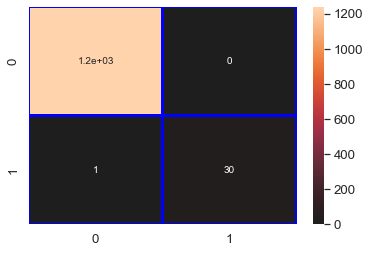

File saved : Fusarium_Wilt_dt_Classifier.pkl
data : {'Accuracy': 99.92, 'Loss': 0.08, 'Precision': 100.0, 'Recall': 96.77, 'f1_score': 98.36, 'Cohen_kappa': 98.32, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'dt_Classifier', 'Filename': 'Fusarium_Wilt_dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 93.55 %
f1_score: 96.67 %
Cohen_kappa_score: 96.59 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      0.94      0.97        31

    accuracy                           1.00      1269
   macro avg       1.00      0.97      0.98      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1238    0]
 [   2   29]]


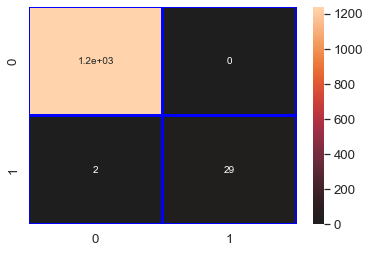

File saved : Fusarium_Wilt_rf_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 93.55, 'f1_score': 96.67, 'Cohen_kappa': 96.59, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'rf_Classifier', 'Filename': 'Fusarium_Wilt_rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 93.55 %
f1_score: 96.67 %
Cohen_kappa_score: 96.59 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      0.94      0.97        31

    accuracy                           1.00      1269
   macro avg       1.00      0.97      0.98      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1238    0]
 [   2   29]]


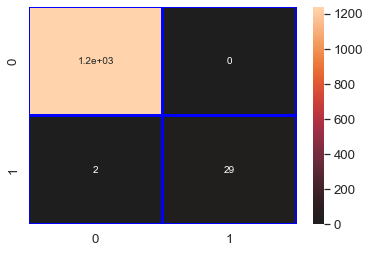

File saved : Fusarium_Wilt_gb_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 93.55, 'f1_score': 96.67, 'Cohen_kappa': 96.59, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'gb_Classifier', 'Filename': 'Fusarium_Wilt_gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.84 %
Loss: 0.16 %
Precision: 100.0 %
Recall: 93.55 %
f1_score: 96.67 %
Cohen_kappa_score: 96.59 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      0.94      0.97        31

    accuracy                           1.00      1269
   macro avg       1.00      0.97      0.98      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1238    0]
 [   2   29]]


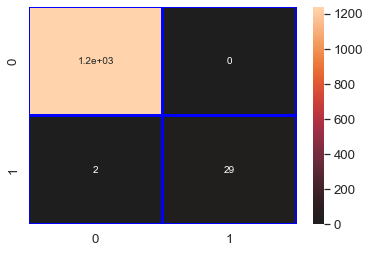

File saved : Fusarium_Wilt_ab_Classifier.pkl
data : {'Accuracy': 99.84, 'Loss': 0.16, 'Precision': 100.0, 'Recall': 93.55, 'f1_score': 96.67, 'Cohen_kappa': 96.59, 'Feature_name': 'Fusarium Wilt', 'Model_name': 'ab_Classifier', 'Filename': 'Fusarium_Wilt_ab_Classifier.pkl'}
Column : Fruit Borer / Blight Blora
Model : lr_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 95.59 %
Loss: 4.41 %
Precision: 86.29 %
Recall: 90.68 %
f1_score: 88.43 %
Cohen_kappa_score: 85.71 %
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1033
           1       0.86      0.91      0.88       236

    accuracy                           0.96      1269
   macro avg       0.92      0.94      0.93      1269
weighted avg       0.96      0.96      0.96      1269

confusion_matrix:
 [[999  34]
 [ 22 214]]


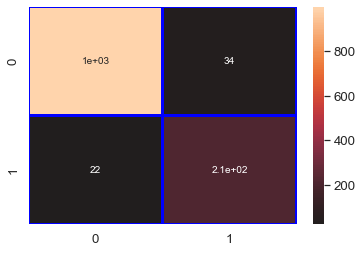

File saved : Fruit_Borer_Blight_Blora_lr_Classifier.pkl
data : {'Accuracy': 95.59, 'Loss': 4.41, 'Precision': 86.29, 'Recall': 90.68, 'f1_score': 88.43, 'Cohen_kappa': 85.71, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'lr_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_lr_Classifier.pkl'}
Model : knn_Classifier
Accuracy_score:

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 98.19 %
Loss: 1.81 %
Precision: 93.12 %
Recall: 97.46 %
f1_score: 95.24 %
Cohen_kappa_score: 94.12 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1033
           1       0.93      0.97      0.95       236

    accuracy                           0.98      1269
   macro avg       0.96      0.98      0.97      1269
weighted avg       0.98      0.98      0.98      1269

confusion_matrix:
 [[1016   17]
 [   6  230]]


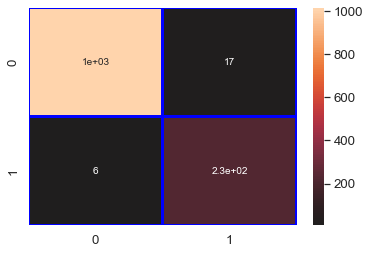

File saved : Fruit_Borer_Blight_Blora_knn_Classifier.pkl
data : {'Accuracy': 98.19, 'Loss': 1.81, 'Precision': 93.12, 'Recall': 97.46, 'f1_score': 95.24, 'Cohen_kappa': 94.12, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'knn_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_knn_Classifier.pkl'}
Model : nb_Classifier
Accuracy_score: 91.73 %
Loss: 8.27 %
Precision: 70.03 %
Recall: 97.03 %
f1_score: 81.35 %
Cohen_kappa_score: 76.21 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1033
           1       0.70      0.97      0.81       236

    accuracy                           0.92      1269
   macro avg       0.85      0.94      0.88      1269
weighted avg       0.94      0.92      0.92      1269

confusion_matrix:
 [[935  98]
 [  7 229]]


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


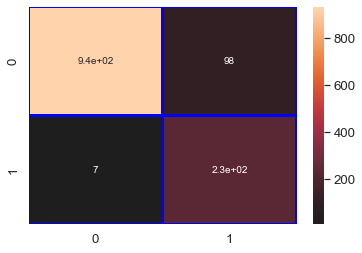

File saved : Fruit_Borer_Blight_Blora_nb_Classifier.pkl
data : {'Accuracy': 91.73, 'Loss': 8.27, 'Precision': 70.03, 'Recall': 97.03, 'f1_score': 81.35, 'Cohen_kappa': 76.21, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'nb_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_nb_Classifier.pkl'}
Model : dt_Classifier
Accuracy_score: 99.76 %
Loss: 0.24 %
Precision: 99.57 %
Recall: 99.15 %
f1_score: 99.36 %
Cohen_kappa_score: 99.22 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      0.99      0.99       236

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1032    1]
 [   2  234]]


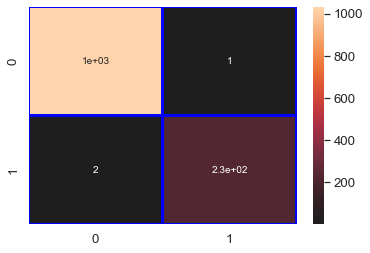

File saved : Fruit_Borer_Blight_Blora_dt_Classifier.pkl
data : {'Accuracy': 99.76, 'Loss': 0.24, 'Precision': 99.57, 'Recall': 99.15, 'f1_score': 99.36, 'Cohen_kappa': 99.22, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'dt_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy_score: 99.68 %
Loss: 0.32 %
Precision: 99.15 %
Recall: 99.15 %
f1_score: 99.15 %
Cohen_kappa_score: 98.96 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       0.99      0.99      0.99       236

    accuracy                           1.00      1269
   macro avg       0.99      0.99      0.99      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1031    2]
 [   2  234]]


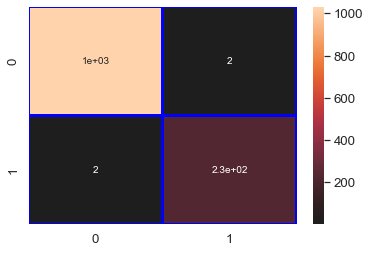

File saved : Fruit_Borer_Blight_Blora_rf_Classifier.pkl
data : {'Accuracy': 99.68, 'Loss': 0.32, 'Precision': 99.15, 'Recall': 99.15, 'f1_score': 99.15, 'Cohen_kappa': 98.96, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'rf_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_rf_Classifier.pkl'}
Model : gb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.68 %
Loss: 0.32 %
Precision: 99.15 %
Recall: 99.15 %
f1_score: 99.15 %
Cohen_kappa_score: 98.96 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       0.99      0.99      0.99       236

    accuracy                           1.00      1269
   macro avg       0.99      0.99      0.99      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1031    2]
 [   2  234]]


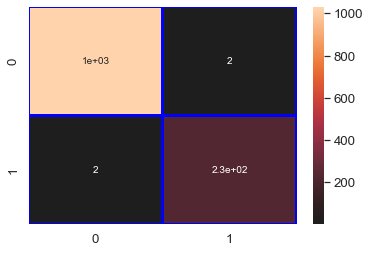

File saved : Fruit_Borer_Blight_Blora_gb_Classifier.pkl
data : {'Accuracy': 99.68, 'Loss': 0.32, 'Precision': 99.15, 'Recall': 99.15, 'f1_score': 99.15, 'Cohen_kappa': 98.96, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'gb_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_gb_Classifier.pkl'}
Model : ab_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy_score: 99.76 %
Loss: 0.24 %
Precision: 99.57 %
Recall: 99.15 %
f1_score: 99.36 %
Cohen_kappa_score: 99.22 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      0.99      0.99       236

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

confusion_matrix:
 [[1032    1]
 [   2  234]]


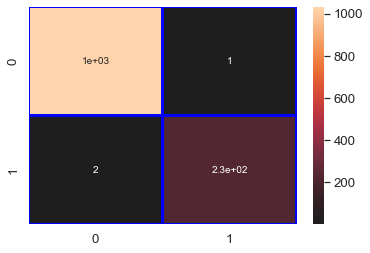

File saved : Fruit_Borer_Blight_Blora_ab_Classifier.pkl
data : {'Accuracy': 99.76, 'Loss': 0.24, 'Precision': 99.57, 'Recall': 99.15, 'f1_score': 99.36, 'Cohen_kappa': 99.22, 'Feature_name': 'Fruit Borer / Blight Blora', 'Model_name': 'ab_Classifier', 'Filename': 'Fruit_Borer_Blight_Blora_ab_Classifier.pkl'}


,Accuracy,Cohen_kappa,Feature_name,Filename,Loss,Model_name,Precision,Recall,f1_score
0,89.52,78.27,Label (Disease Yes/No),Label_Disease_Yes_No__lr_Classifier.pkl,10.48,lr_Classifier,89.24,85.01,87.07
1,88.26,75.47,Label (Disease Yes/No),Label_Disease_Yes_No__knn_Classifier.pkl,11.74,knn_Classifier,89.87,80.83,85.11
2,86.84,72.36,Label (Disease Yes/No),Label_Disease_Yes_No__nb_Classifier.pkl,13.16,nb_Classifier,89.47,77.42,83.01
3,93.46,86.43,Label (Disease Yes/No),Label_Disease_Yes_No__dt_Classifier.pkl,6.54,dt_Classifier,94.40,89.56,91.92
4,96.53,92.88,Label (Disease Yes/No),Label_Disease_Yes_No__rf_Classifier.pkl,3.47,rf_Classifier,94.81,96.96,95.87
5,96.45,92.72,Label (Disease Yes/No),Label_Disease_Yes_No__gb_Classifier.pkl,3.55,gb_Classifier,94.80,96.77,95.77
6,95.11,89.94,Label (Disease Yes/No),Label_Disease_Yes_No__ab_Classifier.pkl,4.89,ab_Classifier,94.12,94.12,94.12
7,84.40,57.91,Type of Disease (Bacterial Blight/Telya),Type_of_Disease_Bacterial_Blight_Telya__lr_Cla...,15.60,lr_Classifier,78.95,59.66,67.96
8,87.86,68.17,Type of Disease (Bacterial Blight/Telya),Type_of_Disease_Bacterial_Blight_Telya__knn_Cl...,12.14,knn_Classifier,83.45,70.17,76.23
9,74.39,40.63,Type of Disease (Bacterial Blight/Telya),Type_of_Disease_Bacterial_Blight_Telya__nb_Cla...,25.61,nb_Classifier,53.08,66.19,58.91


In [44]:

result_df = pd.DataFrame()

for Y in Y_name:
    print(f'Column : {list(Y.columns)[0]}')
    for cls in range(len(classifiers)):
        print(f'Model : {model_name[cls]}')
        model, data = builModels(X, Y, classifiers[cls])

        # save the model to disk
        filename = f'{list(Y.columns)[0]}_{model_name[cls]}'
        filename = re.sub('\W+','_', filename )+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        print(f'File saved : {filename}')
        
        data['Feature_name'] = list(Y.columns)[0]
        data['Model_name'] = model_name[cls]
        data['Filename'] = filename
        
        print(f'data : {data}')
        
        result_df = result_df.append(data, ignore_index=True)
        

# result_df

In [47]:
result_df1 = result_df[['Feature_name', 'Model_name', 'Accuracy', 'Loss', 'Precision', 'Recall', 'f1_score', 'Cohen_kappa', 'Filename']]
result_df1

,Feature_name,Model_name,Accuracy,Loss,Precision,Recall,f1_score,Cohen_kappa,Filename
0,Label (Disease Yes/No),lr_Classifier,89.52,10.48,89.24,85.01,87.07,78.27,Label_Disease_Yes_No__lr_Classifier.pkl
1,Label (Disease Yes/No),knn_Classifier,88.26,11.74,89.87,80.83,85.11,75.47,Label_Disease_Yes_No__knn_Classifier.pkl
2,Label (Disease Yes/No),nb_Classifier,86.84,13.16,89.47,77.42,83.01,72.36,Label_Disease_Yes_No__nb_Classifier.pkl
3,Label (Disease Yes/No),dt_Classifier,93.46,6.54,94.40,89.56,91.92,86.43,Label_Disease_Yes_No__dt_Classifier.pkl
4,Label (Disease Yes/No),rf_Classifier,96.53,3.47,94.81,96.96,95.87,92.88,Label_Disease_Yes_No__rf_Classifier.pkl
5,Label (Disease Yes/No),gb_Classifier,96.45,3.55,94.80,96.77,95.77,92.72,Label_Disease_Yes_No__gb_Classifier.pkl
6,Label (Disease Yes/No),ab_Classifier,95.11,4.89,94.12,94.12,94.12,89.94,Label_Disease_Yes_No__ab_Classifier.pkl
7,Type of Disease (Bacterial Blight/Telya),lr_Classifier,84.40,15.60,78.95,59.66,67.96,57.91,Type_of_Disease_Bacterial_Blight_Telya__lr_Cla...
8,Type of Disease (Bacterial Blight/Telya),knn_Classifier,87.86,12.14,83.45,70.17,76.23,68.17,Type_of_Disease_Bacterial_Blight_Telya__knn_Cl...
9,Type of Disease (Bacterial Blight/Telya),nb_Classifier,74.39,25.61,53.08,66.19,58.91,40.63,Type_of_Disease_Bacterial_Blight_Telya__nb_Cla...


In [49]:
result_df1.to_csv('part6//Model_result.csv', index=False)

# Build model for multi-label classifier

In [57]:
# https://scikit-learn.org/stable/modules/multiclass.html

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import hamming_loss

In [53]:
X = df[['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 
        'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']]
Y = df[['Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 
        'Fusarium Wilt', 'Fruit Borer / Blight Blora']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [62]:
# forest = RandomForestClassifier(random_state=1)
# multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
# predicted = multi_target_forest.fit(X_train, y_train).predict(X_test)
# print(accuracy_score(y_test, predicted))
# print(hamming_loss(y_test, predicted))

In [77]:
def builMultiLabelModels(X_train, X_test, y_train, y_test, classifierModel):
    
    multiLabelModel = MultiOutputClassifier(classifierModel, n_jobs=2)
    # https://stackoverflow.com/questions/32761556/python-scikit-learn-n-jobs
    
    classifierModel = multiLabelModel.fit(X_train, y_train)
    
    y_pred = classifierModel.predict(X_test)
    
    print(y_pred)
    
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    
    print("Hamming_loss:", round((hamming_loss(y_test, y_pred))*100,2),'%')
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
        
#     print("Precision:", round((precision_score(y_test, y_pred))*100,2),'%')
    
#     print("Recall:", round((recall_score(y_test, y_pred))*100,2),'%')
    
#     print("f1_score:", round((f1_score(y_test, y_pred))*100,2),'%')
    
#     print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

#     print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


#     fig, ax = plt.subplots()
#     fig.set_size_inches(6,4) # WH
#     sns.heatmap(confusion_matrix(y_test, y_pred), 
#                annot=True,
#                      linewidths = 2,
#                     linecolor = "blue",
#                     center=0)
#     plt.show()
    
    return classifierModel, {'Accuracy': round((accuracy_score(y_test, y_pred))*100,2), 
                             'Loss': round((1-accuracy_score(y_test, y_pred))*100,2), 
                             'Hamming_loss': round((hamming_loss(y_test, y_pred))*100,2)
#                              'Precision': round((precision_score(y_test, y_pred))*100,2), 
#                              'Recall': round((recall_score(y_test, y_pred))*100,2),
#                              'f1_score': round((f1_score(y_test, y_pred))*100,2),
#                              'Cohen_kappa': round((cohen_kappa_score(y_test, y_pred))*100,2)
                            }

In [79]:

result_df = pd.DataFrame()

for cls in range(len(classifiers)):
    print(f'Model : {model_name[cls]}')
    model, data = builMultiLabelModels(X_train, X_test, y_train, y_test, classifiers[cls])

    # save the model to disk
    filename = f'MultiLabelModel_{model_name[cls]}'
    filename = re.sub('\W+','_', filename )+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print(f'File saved : {filename}')

    data['Model_name'] = model_name[cls]
    data['Filename'] = filename

    print(f'data : {data}')

    result_df = result_df.append(data, ignore_index=True)

result_df

Model : lr_Classifier
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 72.42 %
Loss: 27.58 %
Hamming_loss: 7.38 %
Classification_report:
               precision    recall  f1-score   support

           0       0.72      0.60      0.66       319
           1       0.39      0.18      0.24       164
           2       0.89      0.91      0.90       162
           3       1.00      0.95      0.97        38
           4       0.87      0.92      0.90       243

   micro avg       0.79      0.68      0.73       926
   macro avg       0.78      0.71      0.73       926
weighted avg       0.74      0.68      0.70       926
 samples avg       0.29      0.28      0.27       926

File saved : MultiLabelModel_lr_Classifier.pkl
data : {'Accuracy': 72.42, 'Loss': 27.58, 'Hamming_loss': 7.38, 'Model_name': 'lr_Classifier', 'Filename': 'MultiLabelModel_lr_Classifier.pkl'}
Model : knn_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 84.24 %
Loss: 15.76 %
Hamming_loss: 3.96 %
Classification_report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       319
           1       0.79      0.90      0.84       164
           2       0.95      0.97      0.96       162
           3       0.89      0.66      0.76        38
           4       0.93      0.98      0.96       243

   micro avg       0.87      0.86      0.86       926
   macro avg       0.88      0.84      0.85       926
weighted avg       0.87      0.86      0.86       926
 samples avg       0.34      0.35      0.34       926

File saved : MultiLabelModel_knn_Classifier.pkl
data : {'Accuracy': 84.24, 'Loss': 15.76, 'Hamming_loss': 3.96, 'Model_name': 'knn_Classifier', 'Filename': 'MultiLabelModel_knn_Classifier.pkl'}
Model : nb_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 1]]
Accuracy_score: 62.57 %
Loss: 37.43 %
Hamming_loss: 14.56 %
Classification_report:
               precision    recall  f1-score   support

           0       0.48      0.67      0.56       319
           1       0.37      0.82      0.51       164
           2       0.60      0.99      0.75       162
           3       0.24      0.89      0.38        38
           4       0.72      0.96      0.82       243

   micro avg       0.50      0.84      0.63       926
   macro avg       0.48      0.87      0.60       926
weighted avg       0.53      0.84      0.64       926
 samples avg       0.20      0.33      0.23       926

File saved : MultiLabelModel_nb_Classifier.pkl
data : {'Accuracy': 62.57, 'Loss': 37.43, 'Hamming_loss': 14.56, 'Model_name': 'nb_Classifier', 'Filename': 'MultiLabelModel_nb_Classifier.pkl'}
Model : dt_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 92.91 %
Loss: 7.09 %
Hamming_loss: 1.58 %
Classification_report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       319
           1       0.89      0.88      0.89       164
           2       0.94      1.00      0.97       162
           3       0.88      0.95      0.91        38
           4       0.98      1.00      0.99       243

   micro avg       0.93      0.97      0.95       926
   macro avg       0.92      0.96      0.94       926
weighted avg       0.93      0.97      0.95       926
 samples avg       0.40      0.41      0.40       926

File saved : MultiLabelModel_dt_Classifier.pkl
data : {'Accuracy': 92.91, 'Loss': 7.09, 'Hamming_loss': 1.58, 'Model_name': 'dt_Classifier', 'Filename': 'MultiLabelModel_dt_Classifier.pkl'}
Model : rf_Classifier


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 95.82 %
Loss: 4.18 %
Hamming_loss: 0.88 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       319
           1       0.91      0.95      0.93       164
           2       0.96      1.00      0.98       162
           3       1.00      0.92      0.96        38
           4       0.99      1.00      0.99       243

   micro avg       0.96      0.98      0.97       926
   macro avg       0.97      0.97      0.97       926
weighted avg       0.96      0.98      0.97       926
 samples avg       0.41      0.41      0.41       926



c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


File saved : MultiLabelModel_rf_Classifier.pkl
data : {'Accuracy': 95.82, 'Loss': 4.18, 'Hamming_loss': 0.88, 'Model_name': 'rf_Classifier', 'Filename': 'MultiLabelModel_rf_Classifier.pkl'}
Model : gb_Classifier
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 95.74 %
Loss: 4.26 %
Hamming_loss: 0.99 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       319
           1       0.88      0.95      0.91       164
           2       0.98      1.00      0.99       162
           3       1.00      0.95      0.97        38
           4       0.99      1.00      0.99       243

   micro avg       0.95      0.98      0.97       926
   macro avg       0.96      0.97      0.97       926
weighted avg       0.96      0.98      0.97       926
 samples avg       0.40      0.41      0.40       926



c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


File saved : MultiLabelModel_gb_Classifier.pkl
data : {'Accuracy': 95.74, 'Loss': 4.26, 'Hamming_loss': 0.99, 'Model_name': 'gb_Classifier', 'Filename': 'MultiLabelModel_gb_Classifier.pkl'}
Model : ab_Classifier
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Accuracy_score: 95.35 %
Loss: 4.65 %
Hamming_loss: 1.06 %
Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       319
           1       0.87      0.97      0.92       164
           2       0.98      1.00      0.99       162
           3       1.00      0.95      0.97        38
           4       1.00      1.00      1.00       243

   micro avg       0.96      0.97      0.96       926
   macro avg       0.96      0.97      0.97       926
weighted avg       0.96      0.97      0.96       926
 samples avg       0.40      0.41      0.40       926

File saved : MultiLabelModel_ab_Classifier.pkl
data : {'Accuracy': 95.35, 'Loss

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Filename,Hamming_loss,Loss,Model_name
0,72.42,MultiLabelModel_lr_Classifier.pkl,7.38,27.58,lr_Classifier
1,84.24,MultiLabelModel_knn_Classifier.pkl,3.96,15.76,knn_Classifier
2,62.57,MultiLabelModel_nb_Classifier.pkl,14.56,37.43,nb_Classifier
3,92.91,MultiLabelModel_dt_Classifier.pkl,1.58,7.09,dt_Classifier
4,95.82,MultiLabelModel_rf_Classifier.pkl,0.88,4.18,rf_Classifier
5,95.74,MultiLabelModel_gb_Classifier.pkl,0.99,4.26,gb_Classifier
6,95.35,MultiLabelModel_ab_Classifier.pkl,1.06,4.65,ab_Classifier


In [80]:
result_df1 = result_df[['Model_name', 'Accuracy', 'Loss', 'Hamming_loss', 'Filename']]
result_df1

,Model_name,Accuracy,Loss,Hamming_loss,Filename
0,lr_Classifier,72.42,27.58,7.38,MultiLabelModel_lr_Classifier.pkl
1,knn_Classifier,84.24,15.76,3.96,MultiLabelModel_knn_Classifier.pkl
2,nb_Classifier,62.57,37.43,14.56,MultiLabelModel_nb_Classifier.pkl
3,dt_Classifier,92.91,7.09,1.58,MultiLabelModel_dt_Classifier.pkl
4,rf_Classifier,95.82,4.18,0.88,MultiLabelModel_rf_Classifier.pkl
5,gb_Classifier,95.74,4.26,0.99,MultiLabelModel_gb_Classifier.pkl
6,ab_Classifier,95.35,4.65,1.06,MultiLabelModel_ab_Classifier.pkl


In [81]:
result_df1.to_csv('part6//MultiLabelModel_result.csv', index=False)

# Build multilabel using ANN

In [84]:
from keras.models import Sequential
from keras.layers import Dense

In [112]:
model = Sequential()

model.add(Dense(20, input_dim=8, kernel_initializer='he_uniform', activation='relu'))

for i in range(10):
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))

model.add(Dense(5, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, verbose=1, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
93/93 [==============================] - 1s 5ms/step - loss: 0.5558 - accuracy: 0.1422 - val_loss: 0.3925 - val_accuracy: 0.8314
Epoch 2/50
93/93 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8499 - val_loss: 0.2514 - val_accuracy: 0.8353
Epoch 3/50
93/93 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.7939 - val_loss: 0.2156 - val_accuracy: 0.6872
Epoch 4/50
93/93 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.7411 - val_loss: 0.1965 - val_accuracy: 0.6761
Epoch 5/50
93/93 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.6902 - val_loss: 0.1934 - val_accuracy: 0.8290
Epoch 6/50
93/93 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.7267 - val_loss: 0.1963 - val_accuracy: 0.7463
Epoch 7/50
93/93 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.6955 - val_loss: 0.1834 - val_accuracy: 0.7297
Epoch 8/50
93/93 [==

In [114]:
y_pred = model.predict(X_test)
# round probabilities to class labels
y_pred = y_pred.round()
# calculate accuracy
acc = accuracy_score(y_test, y_pred)
# store result
print(f'Accuracy: {round(acc*100,2)} %')

Accuracy: 72.1 %


In [119]:
y_pred = model.predict([[25, 83, 21, 1001, 0.16, 3, 6, 52]])
y_pred = y_pred.round()
y_pred

array([[1., 0., 0., 0., 1.]], dtype=float32)

In [125]:
# list(X_train.iloc[0].values)

[25.0, 83.0, 21.0, 1001.0, 0.166666666666666, 3.0, 6.2, 52.0]

In [136]:
data = list(X_train.iloc[0].values)
y_pred = model.predict([data])
y_pred = y_pred.round()
list(y_pred[0]), list(y_train.iloc[0].values*1.0)

([1.0, 0.0, 0.0, 0.0, 1.0], [1.0, 1.0, 0.0, 0.0, 1.0])

In [ ]:
10001 => 17  || 11001 => 25 || 10011

In [ ]:
Binary relevance
Classifier chains
Label powerset